# spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data
- 보시면 spam.csv는 라벨이 있는 데이터예요. 물론 8주차 주체가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려볼 수도 있어요!

In [129]:
data = pd.read_csv('./spam.csv')

In [130]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [167]:
data.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [5]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
# text만 활용하는 경우
text = data['v2']

# text에서 spam만 활용하는 경우
spam = data[data.v1 == 'spam']['v2']

# text에서 ham만 활용하는 경우
ham = data[data.v1 == 'ham']['v2']

## Tokenizing
- 실습코드는 물론 한국어 대상이라 konlpy를 다뤘지만, 슬라이드 보시면 영어는 nltk 모듈을 쓸 수 있어요. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋을 것 같아요!

In [7]:
import nltk

In [8]:
# Series -> 하나의 문서로
text2 = ''
for i in text:
    text2 = text2 + i

In [9]:
# 영어 텍스트의 경우 대/소문자 구분하므로 전체 텍스트 통일 후 분석
text = text2.lower()

In [10]:
# 불용어 처리를 위해 nltk에서 제공하는 불용어리스트 활용
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhr50\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# stopwords 확인
eng_stopwords = stopwords.words('english')
eng_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

#### - word_tokenize 사용한 경우

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
word = word_tokenize(text) 
print('불용어 제거 전 단어 개수: ', len(word))
word[:10] # 콤마 등의 기호 하나의 Token으로 분류됨

불용어 제거 전 단어 개수:  98028


['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis']

In [14]:
# 불용어 제거
word = [w for w in word if w not in eng_stopwords]
print('불용어 제거 후 단어 개수: ', len(word))

불용어 제거 후 단어 개수:  65779


#### - RegexpTokenizer 사용한 경우

In [15]:
# 알파벳, 숫자만 고려
from nltk.tokenize import RegexpTokenizer

regtokenizer = RegexpTokenizer(r'\w+')
word_reg = [x for x in regtokenizer.tokenize(text) if x not in eng_stopwords]

In [16]:
print('불용어 및 기호 제거 후 단어 개수: ', len(word_reg))

불용어 및 기호 제거 후 단어 개수:  52418


- stemming 어간 동일화
: 다르게 생긴 단어라고 할지라도 같은 의미들의 단어들을 동일화 하는 과정 ( 단수/복수 또는 시제 등 )

In [17]:
from nltk.stem import PorterStemmer

In [18]:
porter_stemmer = PorterStemmer()
word_reg_stem = []
for w in word_reg:
    word_reg_stem.append(porter_stemmer.stem(w))

In [19]:
print(word_reg[:10])
print(word_reg_stem[:10])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la']
['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la']


#### cf.) spam에서 빈번하게 사용되는 단어 확인

In [20]:
from nltk import FreqDist

In [21]:
spam2 = ''
for i in spam:
    spam2 = spam2 + i

spam = spam2.lower()

In [22]:
fd = FreqDist(spam.split())
fd2 = nltk.probability.FreqDist()
for k,v in fd.items():
    if k not in eng_stopwords:
        fd2[k] = v

In [23]:
fd2.most_common(10)

[('call', 331),
 ('2', 168),
 ('free', 146),
 ('txt', 136),
 ('ur', 129),
 ('mobile', 108),
 ('text', 107),
 ('claim', 105),
 ('u', 98),
 ('reply', 98)]

#### - 임베딩 모델에 사용할 Corpus의 format을 행단위 list로 만들기

In [24]:
def make_corpus_rm_stopwords(text):
    corpus = []
    for s in text:
        corpus.append([porter_stemmer.stem(x) for x in regtokenizer.tokenize(s.lower()) if x not in eng_stopwords])
    return corpus

In [25]:
corpus = make_corpus_rm_stopwords(data.v2)

In [26]:
print(corpus[:5])

[['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat'], ['ok', 'lar', 'joke', 'wif', 'u', 'oni'], ['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18'], ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'], ['nah', 'think', 'goe', 'usf', 'live', 'around', 'though']]


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었어요. 왜 이 임베딩 모델을 적용하게 되었는지 '비교' 결과와 함께 적어주세요!

In [27]:
from gensim.models import Word2Vec, fasttext

> One-hot encoding model
- 단어에 번호르 매기고, 그 번호에 해당하는 요소만 1, 나머지는 0을 갖는 벡터로 변환하는 것. 
- 단점: 벡터 표현에서 단어와 단어 간의 관계가 드러나지 않는다. 

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
word = np.array(word_reg_stem) # list to array
word = word.reshape(-1,1)

In [30]:
print('reshape 이전:', np.array(word_reg_stem))
print('reshape 이후:', word)

reshape 이전: ['go' 'jurong' 'point' ... 'freerofl' 'true' 'name']
reshape 이후: [['go']
 ['jurong']
 ['point']
 ...
 ['freerofl']
 ['true']
 ['name']]


In [31]:
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit(word)

In [32]:
onehot_ebd = onehot_encoded.transform(word).toarray()
onehot_ebd

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

> CBOW model
- Word2Vec의 아이디어: 비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다. -> lookup을 통해 one-hot encoding 문제(n개의 feature) 해결
- 입력: 맥락의 one-hot vector, 출력: 타깃의 one-hot vector 

In [33]:
cbow_model = Word2Vec(corpus, size=5, window=3, min_count=5, workers=1, iter=100, sg=0)

In [34]:
# 모델의 사전에 있는 단어 명을 담은 리스트
words = cbow_model.wv.index2word
print(words[:10])

['u', 'call', '2', 'go', 'get', 'ur', '4', 'gt', 'lt', 'å']


In [35]:
# text token embedding vector
vectors = cbow_model.wv.vectors
vectors

array([[ 0.7521914 ,  0.29241318,  2.2024908 ,  0.1310227 ,  0.09502459],
       [-1.2951928 , -0.5986448 , -0.10730909, -1.6991355 ,  0.85047126],
       [-0.9681322 ,  1.1703387 ,  1.4355047 , -0.59585667, -0.30605853],
       ...,
       [ 0.67157364, -0.50407296,  1.3984985 , -0.10052888, -0.72241503],
       [-2.351767  , -0.23670769,  0.24971344, -0.6619018 ,  0.8112005 ],
       [ 0.4374605 , -0.78531164,  0.4508873 , -0.34570318, -1.414143  ]],
      dtype=float32)

In [36]:
# token과 vector 묶기
cbow_model_result = dict(zip(words, vectors))

> Skip-gram model
- 입력: 타깃의 one-hot vector, 출력: 맥락의 one-hot vector 
- 중심단어(타깃)가 주어졌을 때 주변단어(맥락)가 나타날 확률을 최대화하는 방향으로 학습한다.

In [37]:
skip_gram_model = Word2Vec(corpus, size=5, window=3, min_count=5, workers=1, iter=100, sg=1)

In [38]:
# 모델의 사전에 있는 단어 명을 담은 리스트
words = skip_gram_model.wv.index2word
print(words[:10])

['u', 'call', '2', 'go', 'get', 'ur', '4', 'gt', 'lt', 'å']


In [39]:
# text token embedding vector
vectors = skip_gram_model.wv.vectors
vectors

array([[ 0.25913292, -0.28159317,  1.1417571 , -0.38739774, -0.35841334],
       [-0.8684951 , -0.4814531 ,  0.1960504 , -1.3207201 , -0.01821288],
       [-0.43239218, -0.01313688,  0.9039975 , -0.52763635, -0.32533225],
       ...,
       [ 0.7678071 , -0.62891674,  1.2562082 , -0.53756976, -0.36894763],
       [-1.8788315 , -0.322234  ,  0.26404247, -1.2493703 , -1.0611826 ],
       [ 0.3947186 , -0.8023674 ,  0.2385313 , -1.0946633 , -0.93838125]],
      dtype=float32)

In [40]:
# token과 vector 묶기
skip_gram_model_result = dict(zip(words, vectors))

> GloVe
- Word2Vec의 문제점: 한번에 하나의 출현만 고려하여 전체적인 정보를 이용하지 못해 비효율적, 부정확성 증가 -> GloVe: 전체 텍스트의 정보 활용. 동시 등장 확률 고려
- GloVe의 경우, corpus를 대상으로 공기정보(co-occurrence)행렬 X를 만드는 것부터 시작 (참고: https://www.pythonprogramming.in/how-to-calculate-a-word-word-co-occurrence-matrix.html)

In [47]:
import itertools
from nltk import bigrams

In [48]:
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index

In [49]:
# Create one list using many lists
data = list(itertools.chain.from_iterable(corpus))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
print(data_matrix)

             rain  dancin  velli    j  veget  lord  paul  bognor  somebodi  \
rain          0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
dancin        0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
velli         0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
j             0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
veget         0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
...           ...     ...    ...  ...    ...   ...   ...     ...       ...   
eng           0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
olol          0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
7pm           0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
wait          0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   
07808726822   0.0     0.0    0.0  0.0    0.0   0.0   0.0     0.0       0.0   

             asap  ...  lighter  del  sleepi  hell  never  eng 

In [42]:
from glove import Glove # glove_python 설치 에러로 인해 glove==1.0.0 설치함

C:\Users\jhr50\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\jhr50\Anaconda3\lib\site-packages\glove\glove_inner.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [71]:
glove = Glove(cooccur, d=50, alpha=0.75, x_max=100.0)

In [72]:
for epoch in range(25):
    err = glove.train(step_size=0.05, workers=9, batch_size=50)
    print('epoch %d, error %.3f' % (epoch, err), flush=True)

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0.0] of <class 'float'>

Error: glove_python의 경우 Python3.7 환경에서 설치가 안되는 문제가 있었습니다. glove=1.0.0으로 GloVe 모델을 실행해보려 하였는데, co-occurrence를 dict<int, dict<int, float>> 형식에 맞게 변환하는 데에서 어려움이 생겨 진행을 하지 못했습니다. ㅜㅜ

> Fasttext
- 페이스북이 발표한 방법론, 원래단어를 부분단어(subword)의 벡터들로 표현한다는 점을 제외하고는 Word2Vec과 유사하다. 
- 참고: https://hiseon.me/data-analytics/fasttext-tutorial/
https://fasttext.cc/docs/en/supervised-tutorial.html
https://www.tutorialkart.com/fasttext/train-and-test-supervised-text-classifier-using-fasttext/

In [108]:
import fasttext

In [153]:
# fasttext supervised learning을 위한 train data 만들기 위해 label을 붙인 text 생성
data2 = pd.DataFrame()
data2['v1'] = data['v1'].apply(lambda x: '__label__'+x)
data2['v2'] = data['v2']
data2['v3'] = data2[['v1', 'v2']].apply(lambda x: ' '.join(x), axis=1)
data2

,v1,v2,v3
0,__label__ham,"Go until jurong point, crazy.. Available only ...","__label__ham Go until jurong point, crazy.. Av..."
1,__label__ham,Ok lar... Joking wif u oni...,__label__ham Ok lar... Joking wif u oni...
2,__label__spam,Free entry in 2 a wkly comp to win FA Cup fina...,__label__spam Free entry in 2 a wkly comp to w...
3,__label__ham,U dun say so early hor... U c already then say...,__label__ham U dun say so early hor... U c alr...
4,__label__ham,"Nah I don't think he goes to usf, he lives aro...","__label__ham Nah I don't think he goes to usf,..."
...,...,...,...
5567,__label__spam,This is the 2nd time we have tried 2 contact u...,__label__spam This is the 2nd time we have tri...
5568,__label__ham,Will Ì_ b going to esplanade fr home?,__label__ham Will Ì_ b going to esplanade fr h...
5569,__label__ham,"Pity, * was in mood for that. So...any other s...","__label__ham Pity, * was in mood for that. So...."
5570,__label__ham,The guy did some bitching but I acted like i'd...,__label__ham The guy did some bitching but I a...


In [154]:
# label 붙인 문장을 텍스트 파일 형식으로 저장해줌
label_text = data2['v3']
label_text2 = ''
for i in label_text:
    label_text2 = label_text2 + i + '\n'

In [155]:
# label_text2

In [156]:
f = open('text.txt', mode='wt', encoding='utf-8')
f.write(label_text2)
f.close()

In [157]:
# skip-gram model을 통해 지도학습
model = fasttext.train_supervised('text.txt', wordNgrams=2)

In [150]:
# list of words in dictionary
print(model.words)

['</s>', 'to', 'you', 'a', 'the', 'I', 'and', 'in', 'is', 'i', 'u', 'for', 'my', 'of', 'your', 'me', 'on', 'have', '2', 'that', 'are', 'it', '__ham__I', 'call', 'or', 'be', 'at', 'with', 'not', 'will', 'get', 'can', 'so', 'ur', 'but', '&lt;#&gt;', 'from', '4', 'do', 'up', 'just', '.', 'U', 'go', 'if', 'when', 'know', 'this', 'like', 'we', 'all', 'out', 'got', 'was', 'come', 'now', '?', 'am', "I'm", '...', 'want', 'by', 'time', 'about', 'send', 'only', 'then', 'You', 'going', 'need', 'Call', 'what', 'n', 'still', 'as', 'one', 'he', 'its', 'text', 'our', 'no', "I'll", 'been', 'there', 'good', 'love', 'some', 'think', 'But', 'has', 'r', 'see', 'any', 'back', "don't", 'how', 'an', '&', 'home', 'Ì_', "__ham__I'm", 'tell', 'day', 'her', 'take', 'free', 'If', 'me.', 'dont', 'mobile', 'who', 'they', "i'm", 'him', 'make', 'd', 'new', '-', 'phone', 'give', 'more', 'later', 'now.', '__ham__Ok', 'she', 'much', '__ham__No', 'ask', '&amp;', 'you.', 'Your', 'How', 'We', 'had', 'To', 'txt', 'way', 're

In [158]:
# list of labels
print(model.labels)

['__label__ham', '__label__spam']


In [160]:
print(model.epoch)
print(model.loss)
print(model.wordNgrams)

5
loss_name.softmax
2


In [162]:
def print_results(N, p, r):
    print("N\t" + str(N)) # 문장 개수
    print("P@{}\t{:.3f}".format(1, p)) # precision
    print("R@{}\t{:.3f}".format(1, r)) # recall

print_results(*model.test('text.txt')) # 편의상 학습데이터로 사용된 파일을 테스트로 지정

N	5572
P@1	0.987
R@1	0.987


In [170]:
# test data의 label과 text
data.iloc[0,:]

v1                                                  ham
v2    Go until jurong point, crazy.. Available only ...
Name: 0, dtype: object

In [171]:
data.v2[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [172]:
# test 결과
print (model.predict('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'))

(('__label__ham',), array([0.96136969]))


## 본인이 도출해낸 해석을 적어주세요!

- Plot, Wordcloud, 이진 분류 모델, 유사도 뭐든 관계없으니 분명하고 인상적인 해석 부탁드려요!

#### - Wordcloud
명사는 일반적으로 문장의 목적, 주제를 포함하므로 품사 NN을 추출해서 워드클라우드로 시각화 

In [26]:
from wordcloud import WordCloud
from nltk.tag import pos_tag

- 전체 text인 경우

In [27]:
tags = pos_tag(word_reg_stem)
result = [x[0] for x in tags if x[1]=='NN']

result = FreqDist(result)
print(result.most_common(5))

[('call', 538), ('gt', 258), ('day', 256), ('time', 245), ('lt', 206)]


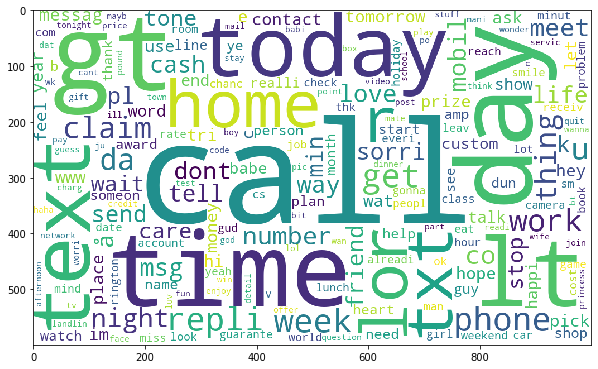

In [28]:
wc = WordCloud(width=1000, height=600, background_color='white')
fig = plt.figure(figsize=(10,10))
plt.imshow(wc.generate_from_frequencies(result))

- spam text인 경우

In [29]:
# 알파벳, 숫자만 고려
word_spam = [x for x in regtokenizer.tokenize(spam) if x not in eng_stopwords]

porter_stemmer = PorterStemmer()
word_spam_stem = []
for w in word_spam:
    word_spam_stem.append(porter_stemmer.stem(w))

[('call', 300), ('txt', 136), ('claim', 110), ('text', 107), ('mobil', 99)]


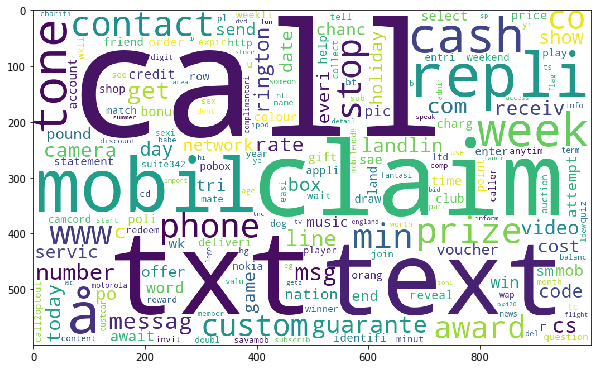

In [30]:
tags2 = pos_tag(word_spam_stem)
result_spam = [x[0] for x in tags2 if x[1]=='NN']

result_spam = FreqDist(result_spam)
print(result_spam.most_common(5))

wc = WordCloud(width=1000, height=600, background_color='white')
fig = plt.figure(figsize=(10,10))
plt.imshow(wc.generate_from_frequencies(result_spam))

- spam이 아닌 text의 경우

In [31]:
ham2 = ''
for i in ham:
    ham2 = ham2 + i

ham = ham2.lower()

In [32]:
# 알파벳, 숫자만 고려
word_ham = [x for x in regtokenizer.tokenize(ham) if x not in eng_stopwords]

porter_stemmer = PorterStemmer()
word_ham_stem = []
for w in word_ham:
    word_ham_stem.append(porter_stemmer.stem(w))

[('gt', 260), ('call', 232), ('time', 226), ('day', 225), ('lt', 207)]


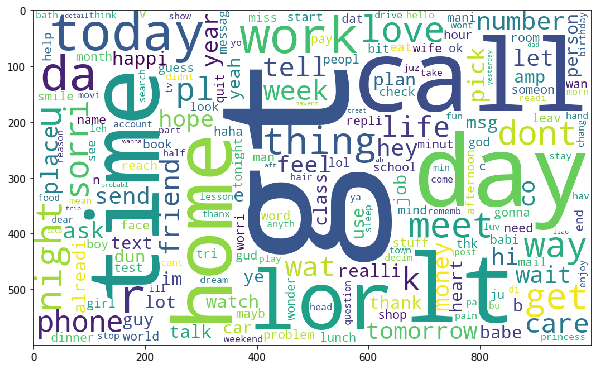

In [33]:
tags3 = pos_tag(word_ham_stem)
result_ham = [x[0] for x in tags3 if x[1]=='NN']

result_ham = FreqDist(result_ham)
print(result_ham.most_common(5))

wc = WordCloud(width=1000, height=600, background_color='white')
fig = plt.figure(figsize=(10,10))
plt.imshow(wc.generate_from_frequencies(result_ham))

- `spam`인 경우에는 call, text(txt), mobile, claim, reply, cash, contact, prize, award 등과 같이 돈과 연관된 단어들, 광고성 메일에서 사용할 법한 단어들이 자주 등장하였습니다. 
- `ham`인 경우에는 시간과 관련된 단어(day, time, today, tomorrow)와 work, home, love, care, meet, friend 등의 일상적인 단어들이 자주 등장하였습니다. 

#### - Fasttext model을 통해 ham/spam 예측

In [183]:
# spam에서 자주 등장한 단어로 이루어진 문장
print(model.predict('mobile claim text prize award cash reply'))

(('__label__spam',), array([0.97395897]))


In [179]:
# ham에서 자주 등장한 단어로 이루어진 문장
print(model.predict('day time today work home meet friend'))

(('__label__ham',), array([0.99858534]))


#### - 코사인 유사도

- 임베딩 모델 적용 기준: spam과 ham에서 자주 등장하는 단어와의 유사도가 높게 추출되는 모델을 선택하기로 합니다. -> Skip-gram model이 대체적으로 0.99의 높은 유사도를 보여주었습니다.

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
# CBOW model 코사인 유사도 기반 token 추출
print('<spam mail에서 자주 등장하는 단어>')
print('call: ', cbow_model.most_similar('call', topn=5))
print('mobil: ', cbow_model.most_similar('mobil', topn=5))
print('cash: ', cbow_model.most_similar('cash', topn=5))
print('text: ', cbow_model.most_similar('text', topn=5))
print('claim: ', cbow_model.most_similar('claim', topn=5))
print('\n')
print('<ham mail에서 자주 등장하는 단어>')
print('day: ', cbow_model.most_similar('day', topn=5))
print('time: ', cbow_model.most_similar('time', topn=5))
print('work: ', cbow_model.most_similar('work', topn=5))
print('home: ', cbow_model.most_similar('home', topn=5))
print('meet: ', cbow_model.most_similar('meet', topn=5))

<spam mail에서 자주 등장하는 단어>
call:  [('08712300220', 0.9901803731918335), ('street', 0.9866423606872559), ('contact', 0.9830536246299744), ('price', 0.9765926599502563), ('quot', 0.972811222076416)]
mobil:  [('receiv', 0.9859360456466675), ('credit', 0.9797803163528442), ('pc', 0.9789237976074219), ('camcord', 0.9784271717071533), ('offer', 0.97095787525177)]
cash:  [('000', 0.9903724193572998), ('discount', 0.9864795207977295), ('å', 0.9845439791679382), ('guarante', 0.9782811403274536), ('5000', 0.9693549275398254)]
text:  [('repli', 0.9917563796043396), ('network', 0.9845365285873413), ('access', 0.9825793504714966), ('urgnt', 0.9822296500205994), ('charg', 0.9807644486427307)]
claim:  [('reward', 0.9950307011604309), ('rental', 0.9909453988075256), ('prize', 0.9885666370391846), ('bonu', 0.9787130355834961), ('landlin', 0.974616289138794)]


<ham mail에서 자주 등장하는 단어>
day:  [('merri', 0.9878346920013428), ('dream', 0.9847594499588013), ('hav', 0.9815934896469116), ('christma', 0.981413424

- work의 경우, bore(boring/bored를 stemming한 결과로 생각), hungri, hurri 단어와 유사하다고 나왔는데, 일하는게 지루하고, 배고프고, 일의 마감에 쫓기는 듯한 느낌의 단어들을 잘 추출한 것 같습니다. 

In [235]:
# Skip-gram model 코사인 유사도 기반 token 추출
print('<spam mail에서 자주 등장하는 단어>')
print('call: ', skip_gram_model.most_similar('call', topn=5))
print('mobil: ', skip_gram_model.most_similar('mobil', topn=5))
print('cash: ', skip_gram_model.most_similar('cash', topn=5))
print('text: ', skip_gram_model.most_similar('text', topn=5))
print('claim: ', skip_gram_model.most_similar('claim', topn=5))
print('\n')
print('<ham mail에서 자주 등장하는 단어>')
print('day: ', skip_gram_model.most_similar('day', topn=5))
print('time: ', skip_gram_model.most_similar('time', topn=5))
print('work: ', skip_gram_model.most_similar('work', topn=5))
print('home: ', skip_gram_model.most_similar('home', topn=5))
print('meet: ', skip_gram_model.most_similar('meet', topn=5))

<spam mail에서 자주 등장하는 단어>
call:  [('2000', 0.9971058368682861), ('worth', 0.9965347051620483), ('within', 0.9947113990783691), ('28', 0.9946771860122681), ('prize', 0.9924134016036987)]
mobil:  [('08000930705', 0.9860612154006958), ('camcord', 0.9856219291687012), ('offer', 0.9833900928497314), ('unlimit', 0.9731141328811646), ('free', 0.9695854187011719)]
cash:  [('000', 0.9978139400482178), ('å', 0.9869259595870972), ('5000', 0.9842174053192139), ('contract', 0.9828172922134399), ('landlin', 0.9826536774635315)]
text:  [('4u', 0.9948490858078003), ('freemsg', 0.9941027164459229), ('charg', 0.9911730289459229), ('doubl', 0.9851399660110474), ('o2', 0.9782594442367554)]
claim:  [('within', 0.9917422533035278), ('28', 0.9901337623596191), ('prize', 0.9895009994506836), ('worth', 0.9880792498588562), ('2000', 0.9872729778289795)]


<ham mail에서 자주 등장하는 단어>
day:  [('compani', 0.9968538880348206), ('didnt', 0.9910712242126465), ('ladi', 0.9879814386367798), ('sister', 0.9876245260238647), ('

- mobile의 경우, offer, unlimit, free 단어와 유사하였는데, 대출 상담 같은 spam인 것 같습니다. 

In [236]:
# mobile - 대출과 관련된 단어와의 유사도
print(skip_gram_model.wv.similarity('cash', 'mobil'))
print(skip_gram_model.wv.similarity('credit', 'mobil'))
print(skip_gram_model.wv.similarity('loan', 'mobil'))

0.87444687
0.89649963
0.7445727
